<a href="https://colab.research.google.com/github/Ademola409/Geospatial_data_science/blob/main/Disasters_Geovisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import relevant libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm 


**Connect the Working Folder**

In [ ]:
cd '/content/drive/MyDrive/DataScience'

/content/drive/MyDrive/DataScience


**Read the CSV file**

In [ ]:
raw_data = pd.read_csv('natural_disaster_human_mobility.csv')
raw_data.head()

,disaster.event,user.anon,latitude,longitude.anon,time
0,01_Wipha,0,139.742561,24.515364,2013-10-20 10:46:03
1,01_Wipha,0,139.702880,24.569996,2013-10-20 18:04:00
2,01_Wipha,0,139.701482,24.550507,2013-10-20 18:04:47
3,01_Wipha,0,139.728029,24.508685,2013-10-20 18:14:42
4,01_Wipha,0,139.702315,24.576521,2013-10-04 20:16:17


**Descriptive Statistics of the Data**

In [ ]:
raw_data.describe(include='all')

,disaster.event,user.anon,latitude,longitude.anon,time
count,4686154,4.686154e+06,4.686154e+06,4.686154e+06,4686154
unique,15,NaN,NaN,NaN,3099700
top,01_Wipha,NaN,NaN,NaN,2014-08-18 20:32:40
freq,1416906,NaN,NaN,NaN,120
mean,NaN,1.431616e+04,3.881831e+01,2.537931e+01,NaN
std,NaN,1.635198e+04,1.097625e+02,1.621122e+01,NaN
min,NaN,0.000000e+00,-1.223578e+02,-3.211515e+01,NaN
25%,NaN,3.159000e+03,-8.312641e+01,2.168389e+01,NaN
50%,NaN,9.241000e+03,1.209904e+02,2.461712e+01,NaN
75%,NaN,1.800300e+04,1.396003e+02,3.804041e+01,NaN


**Copy the raw data**

In [ ]:
data=raw_data.copy()
data.shape

(4686154, 5)

**Count tweets related to disaster events**

In [ ]:
data['disaster.event'].value_counts()

01_Wipha              1416906
08_Rammasun_Manila     817516
32_Detroit             765349
31_Phoenix             579733
33_Baltimore           328880
02_Halong              171559
23_Atlanta             157178
21_Norfolk             115017
12_Bohol               114606
42_AuFire2              64370
06_Kalmaegi             43396
41_AuFire1              43275
14_Napa                 38019
13_Iquique              15297
22_Hamburg              15053
Name: disaster.event, dtype: int64

**Group the data by disaster events**

In [ ]:
data_group = data.groupby(data['disaster.event']).mean()
print(data_group)

                       user.anon    latitude  longitude.anon
disaster.event                                              
01_Wipha            24368.338734  139.668645       28.391620
02_Halong            2482.137684  127.762166       43.006657
06_Kalmaegi           591.625357  120.410101        5.342795
08_Rammasun_Manila  17102.932522  120.997554        9.572405
12_Bohol             3805.313771  123.860556       -2.370050
13_Iquique            781.068314  -70.133271      -18.004903
14_Napa               888.637865 -122.302310       34.441945
21_Norfolk           4276.517602    1.132364       69.428469
22_Hamburg           1428.430413   10.002712       63.611212
23_Atlanta           7803.335969  -84.402464       48.115655
31_Phoenix          11595.664247 -112.088887       21.849586
32_Detroit           8281.965728  -83.117919       38.071186
33_Baltimore         7527.589023  -76.620763       21.977349
41_AuFire1           2572.768018  151.059366      -22.569533
42_AuFire2           399

**Plot the data**

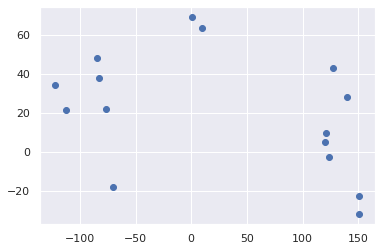

In [ ]:
plt.scatter(data_group.latitude, data_group['longitude.anon'])

**Install Base Map for Geovisualization**

In [ ]:
!pip3 install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 5.0 MB/s 
     |████████████████████████████████| 30.5 MB 73.7 MB/s 
     |████████████████████████████████| 6.3 MB 36.9 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

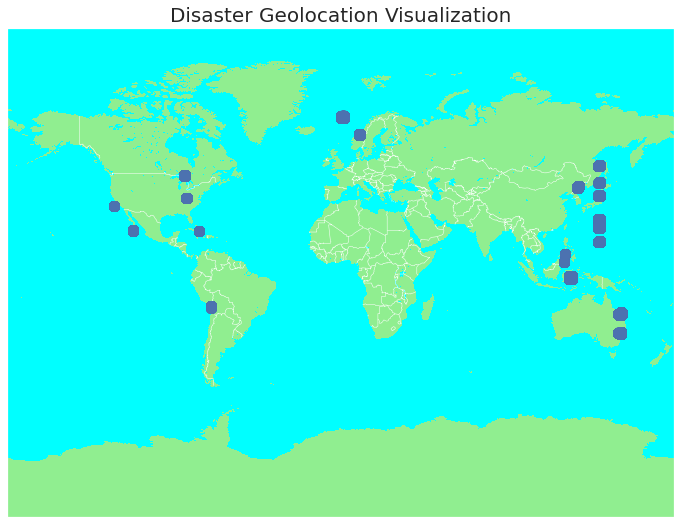

In [ ]:
fig= plt.figure(figsize=(12,9))
m=Basemap(projection='mill',
          llcrnrlat=-90,
          urcrnrlat=90,
          llcrnrlon=-180,
          urcrnrlon=180,
          resolution='l')

m.drawcountries(color='white')
m.drawlsmask(land_color='lightgreen', ocean_color='aqua', lakes=True)
view_list = m(data["latitude"].tolist(), data["longitude.anon"].tolist())

m.scatter(view_list[0], view_list[1], s=100, zorder=2)
plt.title('Disaster Geolocation Visualization', fontsize=20)
plt.show()